Running negsel with N=10 and R=4
running
Calculate results


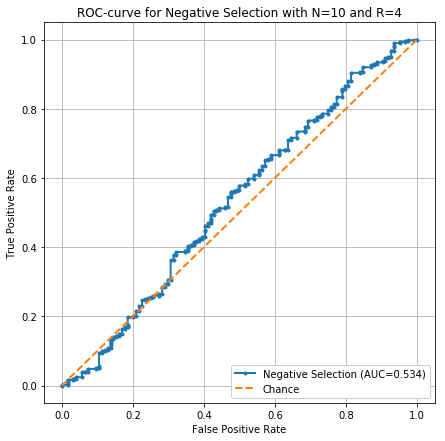

In [12]:
import os, shutil
import pickle
import subprocess
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

SYSCALLS = ["negative-selections"]
OUT_DIR = "out"
TEMP_DIR = "temp"
IMG_DIR = f"{OUT_DIR}/img"
TEST_FILE = "en-mid.test"
    
def generate_roc(n, r, ground, pred):
    fpr, tpr, _ = roc_curve(ground, pred)
    auc_score = auc(fpr, tpr)
    ns_fpr, ns_tpr, _ = roc_curve(ground, np.zeros(len(pred),))
    plt.figure(figsize=(7, 7))
    plt.grid()
    plt.plot(fpr, tpr, marker='.', label=f'Negative Selection (AUC={auc_score:.3f})', linewidth=2)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Chance', linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC-curve for Negative Selection with N={n} and R={r}")
    plt.legend(loc=4, framealpha=1)

def negative_selection(n, r, count=True, log=False):
    count_param = "-c" if count else ""
    log_param = "-l" if log else ""
    print('running')
    os.system(f"java -jar negsel2.jar -self english.train -n {n} -r {r} \
                {count_param} {log_param} < en-mid.test \
                > {OUT_DIR}/N={n}-R={r}-outputm.txt")

def run_negative_selection(n, r):
    # Run negative selection on combined file
    negative_selection(n, r, count=True, log=True)
    output_file = open(f"{OUT_DIR}/N={n}-R={r}-outputm.txt")
    pred = [float(line.strip()) for line in output_file.readlines()]
    
    print("Calculate results")
    # Create labels
    ground = np.zeros(len(pred))
    nr_english = len(open("english.test").readlines())
    ground[nr_english:] = 1
    
    # Plot ROC curve with AUC score
    generate_roc(n, r, ground, pred)
    plt.savefig(f"{IMG_DIR}/N={n}-R={r}-roc.png")

def main():
    n = 10
    r = 4

    print(f"Running negsel with N={n} and R={r}")
    run_negative_selection(n, r)


if __name__ == "__main__":
    main()